In [5]:
pip install biopython

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
import GlobalAlignment as globalAlign
import Burrows0Wheeler as bwt
import MatricesCombinations as comb
from SeedExtend import seed_extend, readFASTA, readFASTQ

# **1) Burrows-Wheeler transformation and FM index** #

In [8]:
t='BANANA$'
p='ANA'
suffix_arr = list(bwt.suffixArray(t))  
#print(bwtViaSa(t))
#print(suffix_arr)
print('C-matrix:')
c=bwt.c_matrix_insert(t)
print(c)  
print('Occ-matrix:')
occ=bwt.occ_matrix_insert(t)
print(occ)

C-matrix:
{'$': 0, 'A': 1, 'B': 4, 'N': 5}
Occ-matrix:
{'$': [0, 0, 0, 0, 1, 1, 1], 'A': [1, 1, 1, 1, 1, 2, 3], 'B': [0, 0, 0, 1, 1, 1, 1], 'N': [0, 1, 2, 2, 2, 2, 2]}


In [9]:
print('BWT and FM index search for pattern', p,'in text', t)
print(bwt.bwm_search(p, c, occ, suffix_arr))

BWT and FM index search for pattern ANA in text BANANA$
[1, 3]


# **2) Global alignment** #

In [10]:
x='TACGTCAGC'
y='TATGTCATGC'
D, alignmentScore=globalAlign.globalAlignment(x,y,globalAlign.scoringMatrix)
alignment, transcript=globalAlign.traceback(x,y, D, globalAlign.scoringMatrix)
print('Matrix for global alignment:')
print (D)
print('Alignment and edit transcript:')
print(alignment)
print(transcript)
print('Alignment score:',alignmentScore)

Matrix for global alignment:
[[  0  -7 -14 -21 -28 -35 -42 -49 -56 -63 -70]
 [ -7   1  -6 -13 -20 -27 -34 -41 -48 -55 -62]
 [-14  -6   2  -5 -12 -19 -26 -33 -40 -47 -54]
 [-21 -13  -5   1  -6 -13 -18 -25 -32 -39 -46]
 [-28 -20 -12  -6   2  -5 -12 -19 -26 -31 -38]
 [-35 -27 -19 -11  -5   3  -4 -11 -18 -25 -32]
 [-42 -34 -26 -18 -12  -4   4  -3 -10 -17 -24]
 [-49 -41 -33 -25 -19 -11  -3   5  -2  -9 -16]
 [-56 -48 -40 -32 -24 -18 -10  -2   2  -1  -8]
 [-63 -55 -47 -39 -31 -25 -17  -9  -3  -1   0]]
Alignment and edit transcript:
TACGTCA_GC
|| |||| ||
TATGTCATGC
MMRMMMMIMM
Alignment score: 0


In [11]:
x='ACACAGTGGGAATATTTCATCATCTGCCTAAGGTTTAAAAGGAAATAACTTTAAGCATGTGTCTAAATAGCAAGTA' #alignmentScore=-93
y='TACACATGTCCTGTTTTGATGTCCTATAATTAATTTTCTCTCCGTTTTTAACTTTTATCTATCTTATTAATGT'
D, alignmentScore=globalAlign.globalAlignment(x,y,globalAlign.scoringMatrix)
alignment, transcript=globalAlign.traceback(x,y, D, globalAlign.scoringMatrix)
print('Matrix for global alignment:')
print (D)
print('Alignment and edit transcript:')
print(alignment)
print(transcript)
print('Alignment score:',alignmentScore)

Matrix for global alignment:
[[   0   -7  -14 ... -497 -504 -511]
 [  -7   -3   -6 ... -489 -496 -503]
 [ -14   -8   -6 ... -481 -488 -495]
 ...
 [-518 -510 -502 ...  -89  -92  -95]
 [-525 -517 -509 ...  -85  -92  -91]
 [-532 -524 -516 ...  -92  -86  -93]]
Alignment and edit transcript:
ACACAGTGGGAATATTTCATCATCTGCCTAAGGTTTAAAAGGAAATAACTTTAAGCATGTGTCTAAATAGCAAGTA_
  |||   |   | |||  | || | ||||   || |            ||| | | | | ||||  |    | |  
_TACACATGTCCTGTTT__TGATGT_CCTATAATTAATTTTCTCTCCGTTTTTAACTTTTATCTATCTTATTAATGT
DRMMMRRRMRRRMRMMMDDMRMMRMDMMMMRRRMMRMRRRRRRRRRRRRMMMRMRMRMRMRMMMMRRMRRRRMRMRI
Alignment score: -93


## **3) Seed and Extend** ##

In [3]:
#fasta_file = "./example_human_reference.fasta"
#fastq_file = "./example_human_Illumina.pe_1.fastq"
#t = readFASTA(fasta_file)[0]
#reads = readFASTQ(fastq_file)
t='ACACAGTGGGAATATTTCATCATCTGCCTAAGGTTTAAAAGGAAATAACTTTAAGCATGTGTCTAAATAGCAAGTA'
reads=['ACACAGTGGGATACACATGTCCTGTTTTGATGTCCTATAA', 'TAAGGTTTAAAAGGAAATAACTTTAAGCATGTGTCTAAATAGCAAGTA']
seed_length = 3
margin = 3
t+='$' #necessary for test for bwt algorithm
c = bwt.c_matrix_insert(t)
occ = bwt.occ_matrix_insert(t)
suffix_arr = bwt.suffixArray(t)   
#firstCols = firstColumnBwm(t)  # HERE WE HAVE FM-INDEX OF OUR FASTA FILE
scoringMatrix=globalAlign.scoringMatrix
for read in reads:
    listAlign=seed_extend(t, read, seed_length, margin, c, occ, suffix_arr, scoringMatrix)
    print(listAlign)

[(0, -32, 'MMMMMMMDMMMDRRMMMRRRMMMRRMDRMRMRMRRRMRRM'), (34, -46, 'DRMMMMRMMRMRRRRMRMDMRRMMMRMMRRRRRMDRMMRR'), (2, -55, 'RRMIMMRMMMDRRMMMRRRMMMRRMDRMRMRMRRRMDDRMM'), (50, -95, 'IMIMIMMMIRRRRMIRRMIMMRIMRMIIIIMIIMMRR')]
[(28, 38, 'MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMD'), (35, -18, 'IIIIIIIMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMD'), (45, -98, 'IIIIIIIIIIIIIIIIIMMMMMMMMMMMMMMMMMMMMMMMMMMMMD'), (51, -146, 'IIIIIIIIIIIIIIIIIIIIIIIMMMMMMMMMMMMMMMMMMMMMMD'), (63, -233, 'IIIIIIIIIIIIIIIIMIIIMIIIIMIIIMIMIIIMIMMRIMIIR')]


In [4]:
x='GTGGGAATATTTCATCATCTGCCTAAGGTTTAAAAGGAAA'
y='CAGTGGGATACACATGTCCTGTTTTGATGTCCTATAA'
D, alignmentScore=globalAlign.globalAlignment(x,y,globalAlign.scoringMatrix)
alignment, transcript=globalAlign.traceback(x,y, D, globalAlign.scoringMatrix)
print('Matrix for global alignment:')
print (D)
print('Alignment and edit transcript:')
print(alignment)
print(transcript)
print('Alignment score:',alignmentScore)

Matrix for global alignment:
[[   0   -7  -14 ... -245 -252 -259]
 [  -7   -3   -8 ... -237 -244 -251]
 [ -14   -8   -6 ... -229 -236 -243]
 ...
 [-266 -258 -250 ...  -57  -49  -43]
 [-273 -265 -257 ...  -64  -56  -48]
 [-280 -272 -264 ...  -64  -63  -55]]
Alignment and edit transcript:
GTG_GGAATATTTCATCATCTGCCTAAGGTTTAAAAGGAAA
  | || |||   |||   |||  |  | | |   |   ||
CAGTGGGATA_CACATGTCCTGTTT_TGATGTCCTA__TAA
RRMIMMRMMMDRRMMMRRRMMMRRMDRMRMRMRRRMDDRMM
Alignment score: -55


## **4) Match, mismatch, gap combinations in Seed and Extend algorithm** ##

### Test 1 ###

In [5]:
t='ACACAGTGGGAATATTTCATCATCTGCCTAAGGTTTAAAAGGAAATAACTTTAAGCATGTGTCTAAATAGCAAGTA'
reads=['ACACAGTGGGATACACATGTCCTGTTTTGATGTCCTATAA', 'TAAGGTTTAAAAGGAAATAACTTTAAGCATGTGTCTAAATAGCAAGTA']
t+='$'
c = bwt.c_matrix_insert(t)
occ = bwt.occ_matrix_insert(t)
suffix_arr = bwt.suffixArray(t) 

In [6]:
def creating_dataframe(t, reads, c, occ, suffix_arr, test):
    kk=0
    for read in reads:
        cols = ['Match', 'Mismatch', 'Gap', 'Start position', 'Alignment score', 'Edit transcript']
        df = pd.DataFrame(columns = cols, index=None)
        match=[0,1,2]
        mismatch=[-3, -2]
        gap=[-7, -5] 
        listAlign=[]
        num=0
        for i in range(len(match)):
            m=match[i]
            for j in range(len(mismatch)):
                miss=mismatch[j]
                for k in range(len(gap)):
                    listAlign=[]
                    g=gap[k]
                    scoringMatrix=comb.scoringMatrixCombination
                    df.loc[num, 'Match'] =m
                    df.loc[num, 'Mismatch'] =miss
                    df.loc[num, 'Gap']=g
                    listAlign.append(comb.seed_extend_comb(t, read, 3, 2, c, occ, suffix_arr, scoringMatrix, m, miss, g))
                    #print(m)
                    #print(miss)
                    #print(g)
                    #print(listAlign)
                    df.loc[num, 'Start position']=listAlign[0][0][1]
                    df.loc[num, 'Alignment score']=listAlign[0][0][2]
                    df.loc[num, 'Edit transcript']=listAlign[0][0][3]
                    num+=1
        #display(df)
        df.to_csv('data_frame_read'+str(kk)+'_'+str(test)+'.csv', sep='\t')
        df.plot(x='Alignment score', y=["Match","Mismatch","Gap"], kind='line')
        plt.title('Read '+read)
        plt.savefig('plot_read'+str(kk)+'_'+str(test)+'.png', dpi=300, bbox_inches='tight')
        #plt.show()
        kk+=1
        if kk==6: break
            

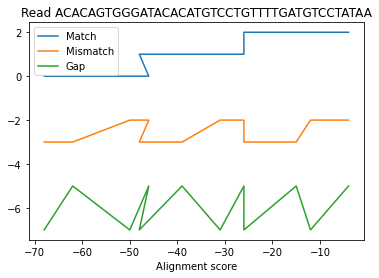

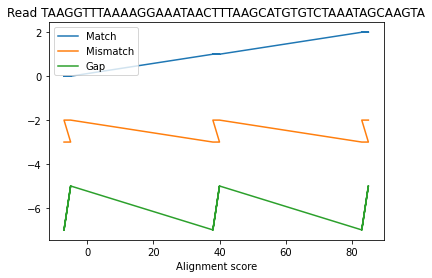

In [7]:
creating_dataframe(t, reads, c, occ, suffix_arr, 'test_1')

### Test 2 ###

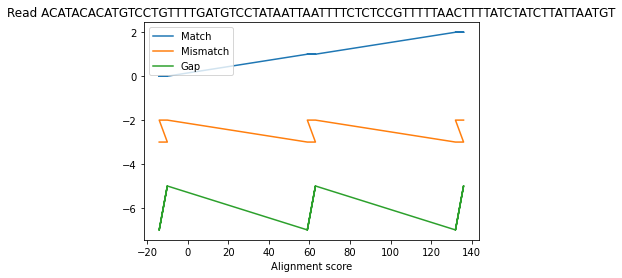

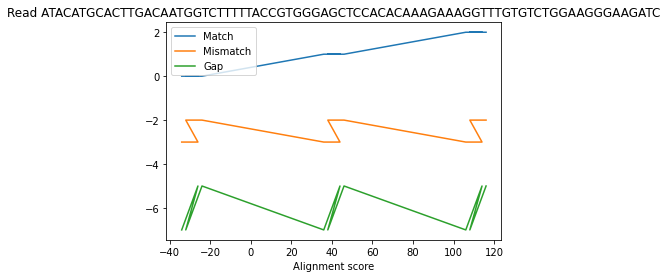

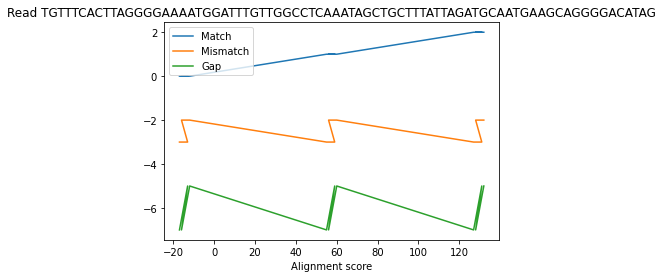

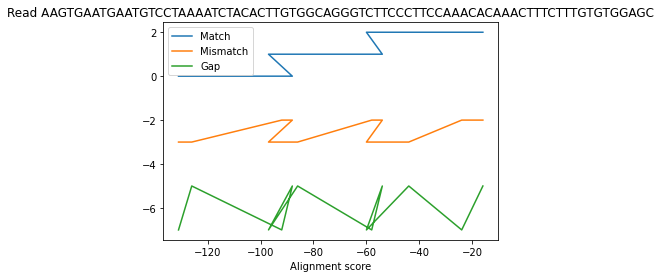

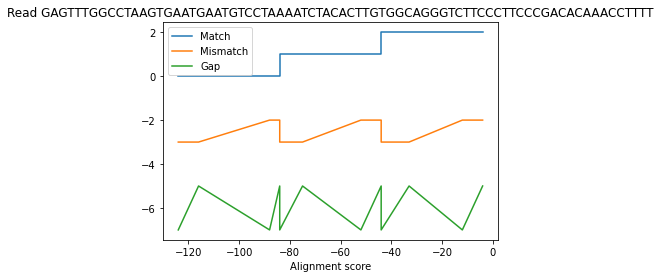

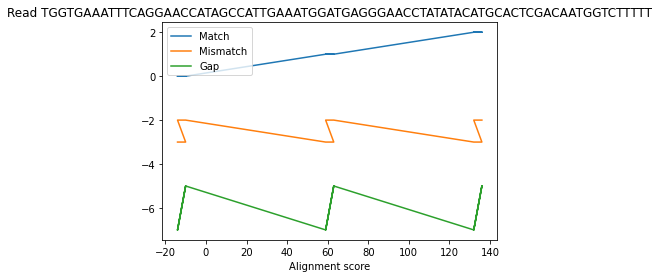

In [67]:
fasta_file = "./example_human_reference.fasta"
fastq_file = "./example_human_Illumina.pe_1.fastq"
t = readFASTA(fasta_file)[0]
reads = readFASTQ(fastq_file)
t+='$' #necessary for test for bwt algorithm
c = bwt.c_matrix_insert(t)
occ = bwt.occ_matrix_insert(t)
suffix_arr = bwt.suffixArray(t)
creating_dataframe(t, reads, c, occ, suffix_arr,'test_2')